In [13]:
import mlai
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
frimport mlai.ProbMapModel as ProbMapModel

ModuleNotFoundError: No module named 'mlai.ProbMapModel'; 'mlai' is not a package

In [5]:
import pods
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

In [6]:
num_data = x.shape[0]
num_pred_data = 100 # how many points to use for plotting predictions
x_pred = np.linspace(1880, 2030, num_pred_data)[:, None] # input locations for predictions

$\newcommand{\Amatrix}{\mathbf{A}}
\newcommand{\KL}[2]{\text{KL}\left( #1\,\|\,#2 \right)} % Kullback Leibler divergence
\newcommand{\Kaast}{\kernelMatrix_{\mathbf{ \ast}\mathbf{ \ast}}}
\newcommand{\Kastu}{\kernelMatrix_{\mathbf{\ast} \inducingVector}}
\newcommand{\Kff}{\kernelMatrix_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\Kfu}{\kernelMatrix_{\mappingFunctionVector \inducingVector}}
\newcommand{\Kuast}{\kernelMatrix_{\inducingVector \bf\ast}}
\newcommand{\Kuf}{\kernelMatrix_{\inducingVector \mappingFunctionVector}}
\newcommand{\Kuu}{\kernelMatrix_{\inducingVector \inducingVector}}
\newcommand{\Kuui}{\Kuu^{-1}}
\newcommand{\Qaast}{{\bf Q}_{\bf \ast \ast}}
\newcommand{\Qastf}{{\bf Q}_{\ast \mappingFunction}}
\newcommand{\Qfast}{{\bf Q}_{\mappingFunctionVector \bf \ast}}
\newcommand{\Qff}{{\bf Q}_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\activationFunction}{\phi}
\newcommand{\activationMatrix}{\boldsymbol{\Phi}}
\newcommand{\activationScalar}{\activationFunction}
\newcommand{\activationVector}{\boldsymbol{\activationFunction}}
\newcommand{\aMatrix}{\mathbf{A}}
\newcommand{\aScalar}{a}
\newcommand{\aVector}{\mathbf{a}}
\newcommand{\acceleration}{a}
\newcommand{\bMatrix}{\mathbf{B}}
\newcommand{\bScalar}{b}
\newcommand{\bVector}{\mathbf{b}}
\newcommand{\basisFunc}{\phi}
\newcommand{\basisFuncVector}{\boldsymbol{\basisFunc}}
\newcommand{\basisFunction}{\phi}
\newcommand{\basisLocation}{\mu}
\newcommand{\basisMatrix}{\boldsymbol{\Phi}}
\newcommand{\basisScalar}{\basisFunction}
\newcommand{\basisVector}{\boldsymbol{\basisFunction}}
\newcommand{\bigO}{\mathcal{O}}
\newcommand{\binomProb}{\pi}
\newcommand{\cMatrix}{\mathbf{C}}
\newcommand{\cbasisMatrix}{\hat{\boldsymbol{\Phi}}}
\newcommand{\cdataMatrix}{\hat{\dataMatrix}}
\newcommand{\cdataScalar}{\hat{\dataScalar}}
\newcommand{\cdataVector}{\hat{\dataVector}}
\newcommand{\centeredKernelMatrix}{\mathbf{\MakeUppercase{\centeredKernelScalar}}}
\newcommand{\centeredKernelScalar}{b}
\newcommand{\centeredKernelVector}{\centeredKernelScalar}
\newcommand{\centeringMatrix}{\mathbf{H}}
\newcommand{\chiSquaredDist}[2]{\chi_{#1}^{2}\left(#2\right)}
\newcommand{\chiSquaredSamp}[1]{\chi_{#1}^{2}}
\newcommand{\conditionalCovariance}{\boldsymbol{\Sigma}}
\newcommand{\coregionalizationMatrix}{\mathbf{\MakeUppercase{\coregionalizationScalar}}}
\newcommand{\coregionalizationScalar}{b}
\newcommand{\coregionalizationVector}{\mathbf{\coregionalizationScalar}}
\newcommand{\covDist}[2]{\text{cov}_{#2}\left(#1\right)}
\newcommand{\covSamp}[1]{\text{cov}\left(#1\right)}
\newcommand{\covarianceScalar}{c}
\newcommand{\covarianceVector}{\mathbf{\covarianceScalar}}
\newcommand{\covarianceMatrix}{\mathbf{C}}
\newcommand{\covarianceTwoScalar}{s}
\newcommand{\covarianceTwoVector}{\mathbf{\covarianceTwoScalar}}
\newcommand{\covarianceTwoMatrix}{\mathbf{S}}
\newcommand{\croupierScalar}{s}
\newcommand{\croupierVector}{\mathbf{\croupierScalar}}
\newcommand{\croupierMatrix}{\mathbf{\MakeUppercase{\croupierScalar}}}
\newcommand{\dataDim}{p}
\newcommand{\dataIndex}{i}
\newcommand{\dataIndexTwo}{j}
\newcommand{\dataMatrix}{\mathbf{Y}}
\newcommand{\dataScalar}{y}
\newcommand{\dataSet}{\mathcal{D}}
\newcommand{\dataStd}{\sigma}
\newcommand{\dataVector}{\mathbf{\dataScalar}}
\newcommand{\decayRate}{d}
\newcommand{\degreeMatrix}{\mathbf{\MakeUppercase{\degreeScalar}}}
\newcommand{\degreeScalar}{d}
\newcommand{\degreeVector}{\mathbf{\degreeScalar}}
\newcommand{\det}[1]{\left|#1\right|}
\newcommand{\diag}[1]{\text{diag}\left(#1\right)}
\newcommand{\diagonalMatrix}{\mathbf{D}}
\newcommand{\diff}[2]{\frac{\text{d}#1}{\text{d}#2}}
\newcommand{\diffTwo}[2]{\frac{\text{d}^2#1}{\text{d}#2^2}}
\newcommand{\displacement}{x}
\newcommand{\displacementVector}{\textbf{\displacement}}
\newcommand{\distanceMatrix}{\mathbf{\MakeUppercase{\distanceScalar}}}
\newcommand{\distanceScalar}{d}
\newcommand{\distanceVector}{\mathbf{\distanceScalar}}
\newcommand{\eigenvaltwo}{\ell}
\newcommand{\eigenvaltwoMatrix}{\mathbf{L}}
\newcommand{\eigenvaltwoVector}{\mathbf{l}}
\newcommand{\eigenvalue}{\lambda}
\newcommand{\eigenvalueMatrix}{\boldsymbol{\Lambda}}
\newcommand{\eigenvalueVector}{\boldsymbol{\lambda}}
\newcommand{\eigenvector}{\mathbf{\eigenvectorScalar}}
\newcommand{\eigenvectorMatrix}{\mathbf{\MakeUppercase{\eigenvectorScalar}}}
\newcommand{\eigenvectorScalar}{u}
\newcommand{\eigenvectwo}{\mathbf{v}}
\newcommand{\eigenvectwoMatrix}{\mathbf{V}}
\newcommand{\eigenvectwoScalar}{v}
\newcommand{\entropy}[1]{\mathcal{H}\left(#1\right)}
\newcommand{\errorFunction}{E}
\newcommand{\expDist}[2]{\left<#1\right>_{#2}}
\newcommand{\expSamp}[1]{\left<#1\right>}
\newcommand{\expectation}[1]{\left\langle #1 \right\rangle }
\newcommand{\expectationDist}[2]{\left\langle #1 \right\rangle _{#2}}
\newcommand{\expectedDistanceMatrix}{\mathcal{D}}
\newcommand{\eye}{\mathbf{I}}
\newcommand{\fantasyDim}{r}
\newcommand{\fantasyMatrix}{\mathbf{\MakeUppercase{\fantasyScalar}}}
\newcommand{\fantasyScalar}{z}
\newcommand{\fantasyVector}{\mathbf{\fantasyScalar}}
\newcommand{\featureStd}{\varsigma}
\newcommand{\gammaCdf}[3]{\mathcal{GAMMA CDF}\left(#1|#2,#3\right)}
\newcommand{\gammaDist}[3]{\mathcal{G}\left(#1|#2,#3\right)}
\newcommand{\gammaSamp}[2]{\mathcal{G}\left(#1,#2\right)}
\newcommand{\gaussianDist}[3]{\mathcal{N}\left(#1|#2,#3\right)}
\newcommand{\gaussianSamp}[2]{\mathcal{N}\left(#1,#2\right)}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\heaviside}{H}
\newcommand{\hiddenMatrix}{\mathbf{\MakeUppercase{\hiddenScalar}}}
\newcommand{\hiddenScalar}{h}
\newcommand{\hiddenVector}{\mathbf{\hiddenScalar}}
\newcommand{\identityMatrix}{\eye}
\newcommand{\inducingInputScalar}{z}
\newcommand{\inducingInputVector}{\mathbf{\inducingInputScalar}}
\newcommand{\inducingInputMatrix}{\mathbf{\MakeUppercase{\inducingInputScalar}}}
\newcommand{\inducingScalar}{u}
\newcommand{\inducingVector}{\mathbf{\inducingScalar}}
\newcommand{\inducingMatrix}{\mathbf{\MakeUppercase{\inducingScalar}}}
\newcommand{\inlineDiff}[2]{\text{d}#1/\text{d}#2}
\newcommand{\inputDim}{q}
\newcommand{\inputMatrix}{{\bf X}}
\newcommand{\inputScalar}{x}
\newcommand{\inputSpace}{\mathcal{X}}
\newcommand{\inputVector}{{\bf \inputScalar}}
\newcommand{\iterNum}{k}
\newcommand{\kernel}{\kernelScalar}
\newcommand{\kernelMatrix}{\mathbf{K}} % Kernel matrix
\newcommand{\kernelScalar}{k}
\newcommand{\kernelVector}{\mathbf{\kernelScalar}}
\newcommand{\kff}{\kernelScalar_{\mappingFunction \mappingFunction}}
\newcommand{\kfu}{\kernelVector_{\mappingFunction \inducingScalar}}
\newcommand{\kuf}{\kernelVector_{\inducingScalar \mappingFunction}}
\newcommand{\kuu}{\kernelVector_{\inducingScalar \inducingScalar}}
\newcommand{\lagrangeMultiplier}{\lambda}
\newcommand{\lagrangeMultiplierMatrix}{\boldsymbol{\Lambda}}
\newcommand{\lagrangian}{L}
\newcommand{\laplacianFactor}{\mathbf{\MakeUppercase{\laplacianFactorScalar}}}
\newcommand{\laplacianFactorScalar}{m}
\newcommand{\laplacianFactorVector}{\mathbf{\laplacianFactorScalar}}
\newcommand{\laplacianMatrix}{\mathbf{L}}
\newcommand{\laplacianScalar}{\ell}
\newcommand{\laplacianVector}{\mathbf{\ell}}
\newcommand{\latentDim}{q}
\newcommand{\latentDistanceMatrix}{\boldsymbol{\Delta}}
\newcommand{\latentDistanceScalar}{\delta}
\newcommand{\latentDistanceVector}{\boldsymbol{\delta}}
\newcommand{\latentForce}{f}
\newcommand{\latentFunction}{u}
\newcommand{\latentFunctionVector}{\mathbf{\latentFunction}}
\newcommand{\latentFunctionMatrix}{\mathbf{\MakeUppercase{\latentFunction}}}
\newcommand{\latentIndex}{j}
\newcommand{\latentScalar}{x}
\newcommand{\latentVector}{\mathbf{\latentScalar}}
\newcommand{\latentMatrix}{\mathbf{\MakeUppercase{\latentScalar}}}
\newcommand{\learnRate}{\eta}
\newcommand{\lengthScale}{\ell}
\newcommand{\rbfWidth}{\ell}
\newcommand{\likelihoodBound}{\mathcal{L}}
\newcommand{\likelihoodFunction}{L}
\newcommand{\locationScalar}{\mu}
\newcommand{\locationVector}{\boldsymbol{\locationScalar}}
\newcommand{\locationMatrix}{\mathbf{M}}
\newcommand{\variance}[1]{\text{var}\left( #1 \right)}
\newcommand{\mappingFunction}{f}
\newcommand{\mappingFunctionMatrix}{\mathbf{F}}
\newcommand{\mappingFunctionTwo}{g}
\newcommand{\mappingFunctionTwoMatrix}{\mathbf{G}}
\newcommand{\mappingFunctionTwoVector}{\mathbf{\mappingFunctionTwo}}
\newcommand{\mappingFunctionVector}{\mathbf{\mappingFunction}}
\newcommand{\mappingScalar}{w}
\newcommand{\mappingVector}{\mathbf{\mappingScalar}}
\newcommand{\mappingMatrix}{\mathbf{W}}
\newcommand{\mappingScalarTwo}{v}
\newcommand{\mappingVectorTwo}{\mathbf{\mappingScalarTwo}}
\newcommand{\mappingMatrixTwo}{\mathbf{V}}
\newcommand{\maxIters}{K}
\newcommand{\meanMatrix}{\mathbf{M}}
\newcommand{\meanScalar}{\mu}
\newcommand{\meanTwoMatrix}{\mathbf{\MakeUppercase{\meanTwoScalar}}}
\newcommand{\meanTwoScalar}{m}
\newcommand{\meanTwoVector}{\mathbf{\meanTwoScalar}}
\newcommand{\meanVector}{\boldsymbol{\meanScalar}}
\newcommand{\mrnaConcentration}{m}
\newcommand{\naturalFrequency}{\omega}
\newcommand{\neighborhood}[1]{\mathcal{N}\left( #1 \right)}
\newcommand{\neilurl}{http://inverseprobability.com/}
\newcommand{\noiseMatrix}{\boldsymbol{E}}
\newcommand{\noiseScalar}{\epsilon}
\newcommand{\noiseVector}{\boldsymbol{\epsilon}}
\newcommand{\norm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\normalizedLaplacianMatrix}{\hat{\mathbf{L}}}
\newcommand{\normalizedLaplacianScalar}{\hat{\ell}}
\newcommand{\normalizedLaplacianVector}{\hat{\mathbf{\ell}}}
\newcommand{\numActive}{m}
\newcommand{\numBasisFunc}{m}
\newcommand{\numComponents}{m}
\newcommand{\numComps}{K}
\newcommand{\numData}{n} % number of data points in the data set
\newcommand{\numFeatures}{K}
\newcommand{\numHidden}{h}
\newcommand{\numInducing}{m} % number of inducing variables in a GP model
\newcommand{\numLayers}{\ell}
\newcommand{\numNeighbors}{K}
\newcommand{\numSequences}{s}
\newcommand{\numSuccess}{s}
\newcommand{\numTasks}{m}
\newcommand{\numTime}{T}
\newcommand{\numTrials}{S}
\newcommand{\outputIndex}{j}
\newcommand{\paramVector}{\boldsymbol{\theta}}
\newcommand{\parameterMatrix}{\boldsymbol{\Theta}}
\newcommand{\parameterScalar}{\theta}
\newcommand{\parameterVector}{\boldsymbol{\parameterScalar}}
\newcommand{\partDiff}[2]{\frac{\partial#1}{\partial#2}}
\newcommand{\precisionScalar}{j}
\newcommand{\precisionVector}{\mathbf{\precisionScalar}}
\newcommand{\precisionMatrix}{\mathbf{\MakeUppercase{\precisionScalar}}}
\newcommand{\pseudotargetScalar}{\widetilde{y}}
\newcommand{\pseudotargetVector}{\mathbf{\pseudotargetScalar}}
\newcommand{\pseudotargetMatrix}{\mathbf{\MakeUppercase{\pseudotargetScalar}}}
\newcommand{\rank}[1]{\text{rank}\left(#1\right)}
\newcommand{\rayleighDist}[2]{\mathcal{R}\left(#1|#2\right)}
\newcommand{\rayleighSamp}[1]{\mathcal{R}\left(#1\right)}
\newcommand{\responsibility}{r}
\newcommand{\rotationScalar}{r}
\newcommand{\rotationVector}{\mathbf{\rotationScalar}}
\newcommand{\rotationMatrix}{\mathbf{\MakeUppercase{\rotationScalar}}}
\newcommand{\sampleCovScalar}{s}
\newcommand{\sampleCovVector}{\mathbf{\sampleCovScalar}}
\newcommand{\sampleCovMatrix}{\mathbf{\MakeUppercase{\sampleCovScalar}}}
\newcommand{\scalarProduct}[2]{\left\langle{#1},{#2}\right\rangle}
\newcommand{\sign}[1]{\text{sign}\left(#1\right)}
\newcommand{\singularvalue}{\ell}
\newcommand{\singularvalueMatrix}{\mathbf{L}}
\newcommand{\singularvalueVector}{\mathbf{l}}
\newcommand{\sorth}{\mathbf{u}}
\newcommand{\spar}{\lambda}
\newcommand{\BasalRate}{B}
\newcommand{\DampingCoefficient}{C}
\newcommand{\DecayRate}{D}
\newcommand{\Displacement}{X}
\newcommand{\LatentForce}{F}
\newcommand{\Mass}{M}
\newcommand{\Sensitivity}{S}
\newcommand{\basalRate}{b}
\newcommand{\dampingCoefficient}{c}
\newcommand{\mass}{m}
\newcommand{\sensitivity}{s}
\newcommand{\springScalar}{\kappa}
\newcommand{\springVector}{\boldsymbol{\kappa}}
\newcommand{\springMatrix}{\boldsymbol{\mathcal{K}}}
\newcommand{\tfConcentration}{p}
\newcommand{\tfDecayRate}{\delta}
\newcommand{\tfMrnaConcentration}{f}
\newcommand{\tfVector}{{\bf \tfConcentration}}
\newcommand{\velocity}{v}
\newcommand{\sufficientStatsScalar}{g}
\newcommand{\sufficientStatsVector}{\mathbf{\sufficientStatsScalar}}
\newcommand{\sufficientStatsMatrix}{\mathbf{\MakeUppercase{\sufficientStatsScalar}}}
\newcommand{\switchScalar}{s}
\newcommand{\switchVector}{\mathbf{\switchScalar}}
\newcommand{\switchMatrix}{\mathbf{\MakeUppercase{\switchScalar}}}
\newcommand{\tr}[1]{\text{tr}\left(#1\right)} % matrix trace
\newcommand{\loneNorm}[1]{\left\Vert #1 \right\Vert_1}
\newcommand{\ltwoNorm}[1]{\left\Vert #1 \right\Vert_2}
\newcommand{\onenorm}[1]{\left\vert#1\right\vert_1}
\newcommand{\twonorm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\vScalar}{v}
\newcommand{\vVector}{\mathbf{v}}
\newcommand{\vMatrix}{\mathbf{V}}
\newcommand{\varianceDist}[2]{\text{var}_{#2}\left( #1 \right)}
\newcommand{\vec}[1]{#1:}
\newcommand{\vecb}[1]{\left(#1\right):}
\newcommand{\weightScalar}{w}
\newcommand{\weightVector}{\mathbf{\weightScalar}}
\newcommand{\weightMatrix}{\mathbf{\MakeUppercase{\weightScalar}}}
\newcommand{\weightedAdjacencyMatrix}{\mathbf{\MakeUppercase{\weightedAdjacencyScalar}}}
\newcommand{\weightedAdjacencyScalar}{a}
\newcommand{\weightedAdjacencyVector}{\mathbf{\weightedAdjacencyScalar}}
\newcommand{\onesVector}{\mathbf{1}} % vector of ones
\newcommand{\zerosVector}{\mathbf{0}} % vector of zeros$


# What is a Gaussian Process?

In this notebook we're going to introduce Gaussian processes, describe what they are and how they can be used in machine learning. 

First of all, we'll consider the question, what is machine learning? By my definition Machine Learning is a combination of

$$\text{data} + \text{model} \rightarrow \text{prediction}$$

and the reason that machine learning has become a mainstay of artificial intelligence is the importance of predictions in artificial intelligence. 

So how do Gaussian processes come in? Well in practice we normally perform machine learning using two functions. To combine data with a model we typically make use of:

**a prediction function** a function which is used to make the predictions. It includes our beliefs about the regularities of the universe, our assumptions about how the world works, e.g. smoothness, spatial similarities, temporal similarities.

**an objective function** a function which defines the cost of misprediction. Typically it includes knowledge about the world's generating processes (probabilistic objectives) or the costs we pay for mispredictions (empiricial risk minimization).

In practice, we normally also have uncertainty associated with these functions. Uncertainty in the prediction function arises from 

1. scarcity of training data and 
2. mismatch between the set of prediction functions we choose and all possible prediction functions.

There are also challenges around specification of the objective function, but for we will save those for another day. For the moment, let us focus on the prediction function. 

## Neural Networks and Prediction Functions

Neural networks are adaptive non-linear function models. Originally, they were studied (by McCulloch and Pitts [@McCulloc:neuron43]) as simple models for neurons, but over the last decade they have become popular because they are a flexible approach to modelling complex data. A particular characteristic of neural network models is that they can be composed to form highly complex functions which encode many of our expectations of the real world. They allow us to encode our assumptions about how the world works.

We will return to composition later, but for the moment, let's focus on a one hidden layer neural network. We are interested in the prediction function, so we'll ignore the objective function (which is often called an error function) for the moment, and just describe the mathematical object of interest

$$
\mappingFunction(\inputVector) = \mappingMatrix^\top \activationVector(\mappingMatrixTwo, \inputVector)
$$

Where in this case $\mappingFunction(\cdot)$ is a scalar function with vector inputs, and $\activationVector(\cdot)$ is a vector function with vector inputs. The dimensionality of the vector function is known as the number of hidden units, or the number of neurons. The elements of this vector function are known as the *activation* function of the neural network and $\mappingMatrixTwo$ are the parameters of the activation functions.

In statistics activation functions are traditionally known as *basis functions*. And we would think of this as a *linear model*. It's doesn't make linear predictions, but it's linear because in statistics estimation focuses on the parameters, $\mappingMatrix$, not the parameters, $\mappingMatrixTwo$. The linear model terminology refers to the fact that the model is *linear in the parameters*, but it is *not* linear in the data unless the activation functions are chosen to be linear.

The first difference in the (early) neural network literature to the classical statistical literature is the decision to optimize these parameters, $\mappingMatrixTwo$, as well as the  parameters, $\mappingMatrix$ (which would normally be denoted in statistics by $\boldsymbol{\beta}$)[^footnote1].

In this tutorial, we're going to go revisit that decision, and follow the path of Radford Neal [@Neal:bayesian94] who, inspired by work of David MacKay [@MacKay:bayesian92] and others did his PhD thesis on Bayesian Neural Networks. If we take a Bayesian approach to parameter inference (note I am using inference here in the classical sense, not in the sense of prediction of test data, which seems to be a newer usage), then we don't wish to fit parameters at all, rather we wish to integrate them away and understand the family of functions that the model describes.

[^footnote1]: In classical statistics we often interpret these parameters, $\beta$, whereas in machine learning we are normally more interested in the result of the prediction, and less in the prediction. Although this is changing with more need for accountability. In honour of this I normally use $\boldsymbol{\beta}$ when I care about the value of these parameters, and $\mappingVector$ when I care more about the quality of the prediction. 

## Probabilistic Modelling

This Bayesian approach is designed to deal with uncertainty arising from fitting our prediction function to the data we have, a reduced data set.

The Bayesian approach can be derived from a broader understanding of what our objective is. If we accept that we can jointly represent all things that happen in the world with a probability distribution, then we can interogate that probability to make predictions. So, if we are interested in predictions, $\dataScalar_*$ at future points input locations of interest, $\inputVector_*$ given previously observed test observations, $\dataVector$ and their corresponding inputs, $\inputMatrix$, then we are really interogating the following probability density,
$$
p(\dataScalar_*|\dataVector, \inputMatrix, \inputVector_*),
$$
there is nothing controversial here, as long as you accept that you have a good joint model of the world around you that relates test data to training data, $p(\dataScalar_*, \dataVector, \inputMatrix, \inputVector_*)$ then this conditional distribution can be recovered through standard rules of probability ($\text{data} + \text{model} \rightarrow \text{prediction}$). 

We can construct this joint density through the use of the following decomposition:
$$
p(\dataScalar_*|\dataVector, \inputMatrix, \inputVector_*) = \int p(\dataScalar_*|\inputVector_*, \parameterVector) p(\parameterVector | \dataVector, \inputMatrix) \text{d} \parameterVector
$$
where, for convenience, we are assuming *all* the parameters of the model are now represented by $\parameterVector$ (which contains $\mappingMatrix$ and $\mappingMatrixTwo$) and $p(\parameterVector | \dataVector, \inputMatrix)$ is recognised as the posterior density of the parameters given data and $p(\dataScalar_*|\inputVector_*, \parameterVector)$ is the *likelihood* of an individual test data point given the parameters. he likelihood of the data is normally assumed to be independent across the parameters,
$$
p(\dataVector|\inputMatrix, \parameterVector) \prod_{i=1}^\numData p(\dataScalar_i|\inputVector_i, \parameterVector),$$
and if that is so, it is easy to extend our predictions across all future, potential, locations,
$$
p(\dataVector_*|\dataVector, \inputMatrix, \inputMatrix_*) = \int p(\dataVector_*|\inputMatrix_*, \parameterVector) p(\parameterVector | \dataVector, \inputMatrix) \text{d} \parameterVector.
$$
The likelihood is also where the *prediction function* is incorporated. For example in the regression case, we consider an objective based around the Gaussian density,
$$
p(\dataScalar_i | \mappingFunction(\inputVector_i)) = \frac{1}{\sqrt{2\pi \dataStd^2}} \exp\left(-\frac{\left(\dataScalar_i - \mappingFunction(\inputVector_i)\right)^2}{2\dataStd^2}\right)
$$

In short, that is the classical approach to probabilistic inference, and all approaches to Bayesian neural networks fall within this path. For a deep probabilistic model, we can simply take this one stage further and place a probability distribution over the input locations,
$$
p(\dataVector_*|\dataVector) = \int p(\dataVector_*|\inputMatrix_*, \parameterVector) p(\parameterVector | \dataVector, \inputMatrix) p(\inputMatrix) p(\inputMatrix_*) \text{d} \parameterVector \text{d} \inputMatrix \text{d}\inputMatrix_*
$$
and we have *unsupervised learning*, and families of deep probabilistic models. 

## Performing Inference

Of course, the devil is in the detail, and while everything is easy to write in terms of probability densities, as we move from $\text{data}$ and $\text{model}$ to $\text{prediction}$ there is that simple $\rightarrow$ sign, which is now burying a wealth of difficulties. Each integral sign above is a high dimensional integral which will typically need approximation. Approximations also come with computational demands. As we consider more complex classes of functions, the challenges around the integrals become harder and prediction of future test data given our model and the data becomes so involved as to be impractical or impossible. 

Statisticians realized these challenges early on, indeed, so early that they were actually physicists, both Laplace and Gauss worked on models such as this, in Gauss's case he made his career on prediction of the location of the lost planet (later reclassified as a asteroid, then dwarf planet), Ceres. Gauss and Laplace made use of maximum a posteriori estimates for simplifying their computations and Laplace developed Laplace's method (and invented the Gaussian density) to expand around that mode. But classical statistics needs better guarantees around model performance and interpretation, and as a result has focussed more on the *linear* model implied by 

$$
\mappingFunction(\inputVector) = \mappingMatrix^\top \activationVector(\parameterVector, \inputVector)
$$

by holding $\parameterVector$ fixed for any given analysis. In this case, a Gaussian prior is formulated over the parameters $\mappingMatrix$,
$$
\mappingMatrix \sim \gaussianSamp{\zerosVector}{\covarianceMatrix}.
$$

The Gaussian likelihood given above implies that the data observation is related to the function by noise corruption so we have,
$$
\dataScalar_i = \mappingFunction(\inputVector_i) + \noiseScalar_i,
$$
where 
$$
\noiseScalar_i \sim \gaussianSamp{0}{\dataStd^2}
$$
and while normally integrating over high dimensional parameter vectors is highly complex, here it is *trivial*. That is because of a property of the multivariate Gaussian.

## Multivariate Gaussian Properties

Gaussian processes are initially of interest because

1. linear Gaussian models are easier to deal with 
2. Even the parameters *within* the process can be handled, by considering a particular limit.

Let's first of all review the properties of the Gaussian process that make linear Gaussian models easier to deal with. We'll return to the, perhaps surprising, result on the parameters within the nonlinearity, $\parameterVector$, shortly.

To work with linear Gaussian models, to find the marginal likelihood all you need to know is the following rules. If
$$
\dataVector = \mappingMatrix \inputVector + \noiseVector,
$$
where $\dataVector$, $\inputVector$ and $\noiseVector$ and we assume that $\inputVector$ and $\noiseVector$ are drawn from multivariate Gaussians,
\begin{align}
\inputVector & \sim \gaussianSamp{\meanVector}{\covarianceMatrix}\\
\noiseVector & \sim \gaussianSamp{\zerosVector}{\covarianceTwoMatrix}
\end{align}
then we know that $\dataVector$ is also drawn from a multivariate Gaussian with,
$$
\dataVector \sim \gaussianSamp{\mappingMatrix\meanVector}{\mappingMatrix\covarianceMatrix\mappingMatrix^\top + \covarianceTwoMatrix}.
$$
which in the case given above we can write all training data as 
$$
\dataVector = \activationMatrix\mappingVector + \noiseVector.
$$

With apprioriately defined covariance, $\covarianceTwoMatrix$, this is actually the marginal likelihood for Factor Analysis, or Probabilistic Principal Component Analysis [@], because we integrated out the inputs (or *latent* variables they would be called in that case). 

However, we are focussing on what happens in models which are non-linear in the inputs, whereas the above would be *linear* in the inputs. To consider these, we introduce a matrix, called the design matrix. We set each activation function computed at each data point to be
$$
\activationScalar_{i,j} = \activationScalar(\mappingVectorTwo_{j}, \inputVector_{i})
$$
and define the matrix of activations (known as the *design matrix* in statistics) to be,
$$
\activationMatrix = 
\begin{bmatrix}
\activationScalar_{1, 1} & \activationScalar_{1, 2} & \dots & \activationScalar_{1, \numHidden} \\
\activationScalar_{1, 2} & \activationScalar_{1, 2} & \dots & \activationScalar_{1, \numData} \\
\vdots & \vdots & \ddots & \vdots \\
\activationScalar_{\numData, 1} & \activationScalar_{\numData, 2} & \dots & \activationScalar_{\numData, \numHidden}
\end{bmatrix}.
$$
By convention this matrix always has $\numData$ rows and $\numHidden$ columns, now if we define the vector of all noise corruptions, $\noiseVector = \left[\noiseScalar_1, \dots \noiseScalar_\numData\right]^\top$. If we define the prior distribution over the vector $\mappingVector$ to be Gaussian,
$$
\mappingVector \sim \gaussianSamp{\zerosVector}{\alpha\eye},
$$
then we can use rules of multivariate Gaussians to see that,
$$
\dataVector \sim \gaussianSamp{\zerosVector}{\alpha \activationMatrix \activationMatrix^\top + \dataStd^2 \eye}.
$$

In other words, our training data is distributed as a multivariate Gaussian, with zero mean and a covariance given by 
$$
\kernelMatrix = \alpha \activationMatrix \activationMatrix^\top + \dataStd^2 \eye.
$$
This is an $\numData \times \numData$ size matrix. Its elements are in the form of a function. The maths shows that any element, index by $i$ and $j$, is a function *only* of inputs associated with data points $i$ and $j$, $\dataVector_i$, $\dataVector_j$. $\kernel_{i,j} = \kernel\left(\inputVector_i, \inputVector_j\right)$

If we look at the portion of this function associated only with $\mappingFunction(\cdot)$, i.e. we remove the noise, then we can write down the covariance associated with our neural network,
$$
\kernel_\mappingFunction\left(\inputVector_i, \inputVector_j\right) = \alpha \activationVector\left(\mappingMatrixTwo, \inputVector_i\right)^\top \activationVector\left(\mappingMatrixTwo, \inputVector_j\right)
$$
so the elements of the covariance or *kernel* matrix are formed by inner products of the rows of the *design matrix*.  

This is the essence of a Gaussian process. Instead of making assumptions about our density over each data point, $\dataScalar_i$ as i.i.d. we make a joint Gaussian assumption over our data. The covariance matrix is now a function of both the parameters of the activation function, $\mappingMatrixTwo$, and the input variables, $\inputMatrix$. This comes about through integrating out the parameters of the model, $\mappingVector$. 

We can basically put anything inside the basis functions, and many people do. These can be deep kernels [@Cho:deep09] or we can learn the parameters of a convolutional neural network inside there.

Viewing a neural network in this way is also what allows us to beform sensible *batch* normalizations [@Ioffe:batch15].

## Non-degenerate Gaussian Processes

The process described above is degenerate. The covariance function is of rank at most $\numHidden$ and since the theoretical amount of data could always increase $\numData \rightarrow \infty$, the covariance function is not full rank. 
This means as we increase the amount of data to infinity, there will come a point where we can't normalize the process because the multivariate Gaussian has the form,
$$
\gaussianDist{\mappingFunctionVector}{\zerosVector}{\kernelMatrix} = \frac{1}{\left(2\pi\right)^{\frac{\numData}{2}}\det{\kernelMatrix}^\frac{1}{2}} \exp\left(-\frac{\mappingFunctionVector^\top\kernelMatrix \mappingFunctionVector}{2}\right) 
$$
and a non-degenerate kernel matrix leads to $\det{\kernelMatrix} = 0$ defeating the normalization (it's equivalent to finding a projection in the high dimensional Gaussian where the variance of the the resulting univariate Gaussian is zero, i.e. there is a null space on the covariance, or alternatively you can imagine there are one or more directions where the Gaussian has become the delta function). 

In the machine learning field, it was Radford Neal [Neal:bayesian94] that realized the potential of the next step. In his 1994 thesis, he was considering Bayesian neural networks, of the type we described above, and in considered what would happen if you took the number of hidden nodes, or neurons, to infinity, i.e. $\numHidden \rightarrow \infty$. 

![http://www.cs.toronto.edu/~radford/ftp/thesis.pdf](../diagrams/neal-infinite-priors.png)
*Page 37 of Radford Neal's 1994 thesis*

In loose terms, what Radford considers is what happens to the elements of the covariance function, 
\begin{align*}
\kernel_\mappingFunction\left(\inputVector_i, \inputVector_j\right) & = \alpha \activationVector\left(\mappingMatrixTwo, \inputVector_i\right)^\top \activationVector\left(\mappingMatrixTwo, \inputVector_j\right)\\
& = \sum_k \activationScalar\left(\mappingVectorTwo_k, \inputVector_i\right) \activationScalar\left(\mappingVectorTwo_k, \inputVector_j\right)
\end{align*}
if instead of considering a finite number you sample infinitely many of these activation functions, sampling parameters from a prior density, $p(\mappingVectorTwo)$, for each one,
$$
\kernel_\mappingFunction\left(\inputVector_i, \inputVector_j\right) = \int \activationScalar\left(\mappingVectorTwo, \inputVector_i\right) \activationScalar\left(\mappingVectorTwo, \inputVector_j\right) p(\mappingVectorTwo) \text{d}\mappingVectorTwo
$$
And that's not *only* for Gaussian $p(\mappingVectorTwo)$. In fact this result holds for a range of activations, and a range of prior densities because of the *central limit theorem*. 

To write it in the form of a probabilistic program, as long as the distribution for $\phi_i$ implied by this short probabilistic program,
\begin{align*}
\mappingVectorTwo & \sim p(\cdot)\\
\phi_i & = \activationScalar\left(\mappingVectorTwo, \inputVector_i\right), 
\end{align*}
has finite variance, then the result of taking the number of hidden units to infinity, with appropriate scaling, is also a Gaussian process. 

To understand this argument in more detail, I highly recommend reading chapter 2 of Neal's thesis, which remains easy to read and clear today. Indeed, for readers interested in Bayesian neural networks, both Raford Neal's and David MacKay's PhD thesis [@MacKay:bayesian92] remain essential reading. Both theses embody a clarity of thought, and an ability to weave together threads from different fields that was the business of machine learning in the 1990s. Radford and David were also pioneers in making their software widely available and publishing material on the web.





In [7]:
# %load -s compute_kernel mlai
def compute_kernel(X, X2=None, kernel=None, **kwargs):
    """Compute the full covariance function given a kernel function for two data points."""
    if X2 is None:
        X2 = X
    K = np.zeros((X.shape[0], X2.shape[0]))
    for i in np.arange(X.shape[0]):
        for j in np.arange(X2.shape[0]):
            
            K[i, j] = kernel(X[i, :], X2[j, :], **kwargs)
        
    return K


## Learning and Inference in Gaussian Processes





The Gaussian process perspective takes the marginal likelihood of the data to be a joint Gaussian density with a covariance given by $\kernelMatrix$. So the model likelihood is of the form,
$$
p(\dataVector|\inputMatrix) = \frac{1}{(2\pi)^{\frac{\numData}{2}}|\kernelMatrix|^{\frac{1}{2}}} \exp\left(-\frac{1}{2}\dataVector^\top \left(\kernelMatrix+\dataStd^2 \mathbf{I}\right)^{-1}\dataVector\right)
$$
where the input data, $\inputMatrix$, influences the density through the covariance matrix, $\kernelMatrix$ whose elements are computed through the covariance function, $\kernelScalar(\inputVector, \inputVector^\prime)$.

This means that the negative log likelihood (the objective function) is given by,
$$
E(\parameterVector) = \frac{1}{2} \log |\kernelMatrix| + \frac{1}{2} \dataVector^\top \left(\kernelMatrix + \dataStd^2\eye\right)^{-1}\dataVector
$$
where the *parameters* of the model are also embedded in the covariance function, they include the parameters of the kernel (such as lengthscale and variance), and the noise variance, $\dataStd^2$.

Let's create a class in python for storing these variables.

The properties of multivariate Gaussian densities this prior over parameters implies a particular density for our data observations, $\dataVector$. In this session we sampled directly from this distribution for our data, avoiding the intermediate weight-space representation. This is the approach taken by *Gaussian processes*. In a Gaussian process you specify the *covariance function* directly, rather than *implicitly* through a basis matrix and a prior over parameters. Gaussian processes have the advantage that they can be *nonparametric*, which in simple terms means that they can have *infinite* basis functions. In the lectures we introduced the *exponentiated quadratic* covariance, also known as the RBF or the Gaussian or the squared exponential covariance function. This covariance function is specified by
$$
k(\inputVector, \inputVector^\prime) = \alpha \exp\left( -\frac{\left\Vert \inputVector-\inputVector^\prime\right\Vert^2}{2\ell^2}\right).
$$
where $\left\Vert\inputVector - \inputVector^\prime\right\Vert^2$ is the squared distance between the two input vectors 
$$
\left\Vert\inputVector - \inputVector^\prime\right\Vert^2 = (\inputVector - \inputVector^\prime)^\top (\inputVector - \inputVector^\prime) 
$$
Let's build a covariance matrix based on this function. First we define the form of the covariance function,

In [8]:
# %load -s exponentiated_quadratic mlai
def exponentiated_quadratic(x, x_prime, variance=1., lengthscale=1.):
    "Exponentiated quadratic covariance function."
    r = np.linalg.norm(x-x_prime, 2)
    return variance*np.exp((-0.5*r*r)/lengthscale**2)        


We can use this to compute *directly* the covariance for $\mathbf{f}$ at the points given by `x_pred`. Let's define a new function `compute_kernel()` which does this,

In [9]:
# %load -s compute_kernel mlai
def compute_kernel(X, X2=None, kernel=None, **kwargs):
    """Compute the full covariance function given a kernel function for two data points."""
    if X2 is None:
        X2 = X
    K = np.zeros((X.shape[0], X2.shape[0]))
    for i in np.arange(X.shape[0]):
        for j in np.arange(X2.shape[0]):
            
            K[i, j] = kernel(X[i, :], X2[j, :], **kwargs)
        
    return K


Now we can image the resulting covariance,

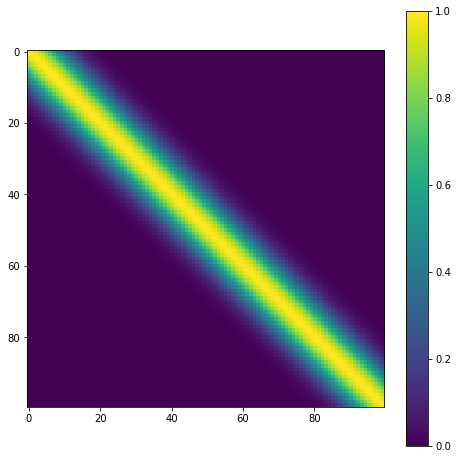

In [10]:
K = compute_kernel(x_pred, x_pred, exponentiated_quadratic, variance=1., lengthscale=10.)
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(K, interpolation='none')
fig.colorbar(im)

Finally, we can sample functions from the marginal likelihood.

/Users/lawrennd/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  from ipykernel import kernelapp as app


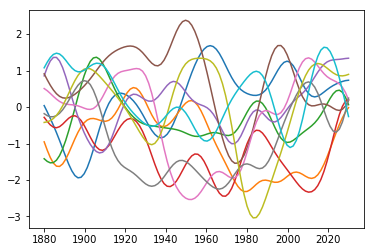

In [11]:
for i in range(10):
    y_sample = np.random.multivariate_normal(mean=np.zeros(x_pred.size), cov=K)
    plt.plot(x_pred.flatten(), y_sample.flatten())

The Gaussian process perspective takes the marginal likelihood of the data to be a joint Gaussian density with a covariance given by $\kernelMatrix$. So the model likelihood is of the form,
$$
p(\dataVector|\inputMatrix) = \frac{1}{(2\pi)^{\frac{\numData}{2}}|\kernelMatrix|^{\frac{1}{2}}} \exp\left(-\frac{1}{2}\dataVector^\top \left(\kernelMatrix+\dataStd^2 \mathbf{I}\right)^{-1}\dataVector\right)
$$
where the input data, $\inputMatrix$, influences the density through the covariance matrix, $\kernelMatrix$ whose elements are computed through the covariance function, $\kernelScalar(\inputVector, \inputVector^\prime)$.

This means that the negative log likelihood (the objective function) is given by,
$$
E(\parameterVector) = \frac{1}{2} \log |\kernelMatrix| + \frac{1}{2} \dataVector^\top \left(\kernelMatrix + \dataStd^2\eye\right)^{-1}\dataVector
$$
where the *parameters* of the model are also embedded in the covariance function, they include the parameters of the kernel (such as lengthscale and variance), and the noise variance, $\dataStd^2$.

Let's create a class in python for storing these variables.

In [12]:
# %load -s GP mlai.py
class GP(ProbMapModel):
    def __init__(self, X, y, sigma2, kernel, **kwargs):
        self.K = compute_kernel(X, X, kernel, **kwargs)
        self.X = X
        self.y = y
        self.sigma2 = sigma2
        self.kernel = kernel
        self.kernel_args = kwargs
        self.update_inverse()
        self.name = 'GP_'+kernel.__name__
        self.objective_name = 'Negative Marginal Likelihood'

    def update_inverse(self):
        # Pre-compute the inverse covariance and some quantities of interest
        ## NOTE: This is *not* the correct *numerical* way to compute this! It is for ease of mapping onto the maths.
        self.Kinv = np.linalg.inv(self.K+self.sigma2*np.eye(self.K.shape[0]))
        # the log determinant of the covariance matrix.
        self.logdetK = np.linalg.det(self.K+self.sigma2*np.eye(self.K.shape[0]))
        # The matrix inner product of the inverse covariance
        self.Kinvy = np.dot(self.Kinv, self.y)
        self.yKinvy = (self.y*self.Kinvy).sum()

    def fit(self):
        pass

    def update_nll(self):
        "Precompute the log determinant and quadratic term from the negative log likelihod"
        self.log_det = 0.5*(self.K.shape[0]*np.log(2*np.pi) + self.logdetK)
        self.quadratic =  0.5*self.yKinvy
                            
    def nll_split(self):
        "Return the two components of the negative log likelihood"
        return self.log_det, self.quadratic
    
    def log_likelihood(self):
        "Use the pre-computes to return the likelihood"
        self.update_nll()
        return -self.log_det - self.quadratic
    
    def objective(self):
        "Use the pre-computes to return the objective function"
        return -self.log_likelihood()

    def predict(self, X_test, full_cov=False):
        "Give a mean and a variance of the prediction."
        K_star = compute_kernel(self.X, X_test, self.kernel, **self.kernel_args)
        A = np.dot(self.Kinv, K_star)
        mu_f = np.dot(A.T, self.y)
        k_starstar = compute_diag(X_test, self.kernel, **self.kernel_args)
        c_f = k_starstar - (A*K_star).sum(0)[:, None]
        return mu_f, c_f


NameError: name 'ProbMapModel' is not defined

## Making Predictions

We now have a probability density that represents functions. How do we make predictions with this density? The density is known as a process because it is *consistent*. By consistency, here, we mean that the model makes predictions for $\mappingFunctionVector$ that are unaffected by future values of $\mappingFunctionVector^*$ that are currently unobserved (such as test points). If we think of $\mappingFunctionVector^*$ as test points, we can still write down a joint probability density over the training observations, $\mappingFunctionVector$ and the test observations, $\mappingFunctionVector^*$. This joint probability density will be Gaussian, with a covariance matrix given by our covariance function, $\kernelScalar(\inputVector_i, \inputVector_j)$. 
$$
\begin{bmatrix}\mappingFunctionVector \\ \mappingFunctionVector^*\end{bmatrix} \sim \gaussianSamp{\mathbf{0}}{\begin{bmatrix} \kernelMatrix & \kernelMatrix_\ast \\ \kernelMatrix_\ast^\top & \kernelMatrix_{\ast,\ast}\end{bmatrix}}.
$$
Here $\kernelMatrix$ is the covariance computed between all the training points, $\kernelMatrix_\ast$ is the covariance matrix computed between the training points and the test points and $\kernelMatrix_{\ast,\ast}$ is the covariance matrix computed betwen all the tests points and themselves. To be clear, let's compute these now for our example, using `x` and `y` for the training data (although `y` doesn't enter the covariance) and `x_pred` as the test locations.

In [ ]:
# set covariance function parameters
variance = 16.0
lengthscale = 8
# set noise variance
sigma2 = 0.05

K = compute_kernel(x, x, exponentiated_quadratic, variance=variance, lengthscale=lengthscale)
K_star = compute_kernel(x, x_pred, exponentiated_quadratic, variance=variance, lengthscale=lengthscale)
K_starstar = compute_kernel(x_pred, x_pred, exponentiated_quadratic, variance=variance, lengthscale=lengthscale)

Now we use this structure to visualise the covariance between test data and training data. This structure is how information is passed between trest and training data. Unlike the maximum likelihood formalisms we've been considering so far, the structure expresses *correlation* between our different data points. However, we now have a *joint density* between some variables of interest. In particular we have the joint density over $p(\mappingFunctionVector, \mappingFunctionVector^*)$. The joint density is *Gaussian* and *zero mean*. It is specified entirely by the *covariance matrix*, $\kernelMatrix$. That covariance matrix is, in turn, defined by a covariance function. Now we will visualise the form of that covariance in the form of the matrix,
$$
\begin{bmatrix} \kernelMatrix & \kernelMatrix_\ast \\ \kernelMatrix_\ast^\top & \kernelMatrix_{\ast,\ast}\end{bmatrix}
$$

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(np.vstack([np.hstack([K, K_star]), np.hstack([K_star.T, K_starstar])]), interpolation='none')
# Add lines for separating training and test data
ax.axvline(x.shape[0]-1, color='w')
ax.axhline(x.shape[0]-1, color='w')
fig.colorbar(im)

There are four blocks to this color plot. The upper left block is the covariance of the training data with itself, $\kernelMatrix$. We see some structure here due to the missing data from the first and second world wars. Alongside this covariance (to the right and below) we see the cross covariance between the training and the test data ($\kernelMatrix_*$ and $\kernelMatrix_*^\top$). This is giving us the covariation between our training and our test data. Finally the lower right block The banded structure we now observe is because some of the training points are near to some of the test points. This is how we obtain 'communication' between our training data and our test data. If there is no structure in $\kernelMatrix_*$ then our belief about the test data simply matches our prior.

## Conditional Density

Just as in naive Bayes, we first defined the joint density (although there it was over both the labels and the inputs, $p(\dataVector, \inputVector)$ and now we need to define *conditional* distributions that answer particular questions of interest. In particular we might be interested in finding out the values of the function for the prediction function at the test data given those at the training data, $p(\mappingFunctionVector_*|\mappingFunctionVector)$. Or if we include noise in the training observations then we are interested in the conditional density for the prediction function at the test locations given the training observations, $p(\mappingFunctionVector^*|\dataVector)$. 

As ever all the various questions we could ask about this density can be answered using the *sum rule* and the *product rule*. For the multivariate normal density the mathematics involved is that of *linear algebra*, with a particular emphasis on the *partitioned inverse* or [*block matrix inverse*](http://en.wikipedia.org/wiki/Invertible_matrix#Blockwise_inversion), but they are beyond the scope of this course, so you don't need to worry about remembering them or rederiving them. We are simply writing them here because it is this *conditional* density that is necessary for making predictions.

The conditional density is also a multivariate normal,
$$
\mappingFunctionVector^* | \mappingFunctionVector \sim \mathcal{N}(\boldsymbol{\mu}_f,\mathbf{C}_f)
$$
with a mean given by
$$
\boldsymbol{\mu}_f = \kernelMatrix_*^\top \left[\kernelMatrix + \dataStd^2 \mathbf{I}\right]^{-1} \dataVector
$$
and a covariance given by 
$$
\mathbf{C}_f = \kernelMatrix_{*,*} - \kernelMatrix_*^\top \left[\kernelMatrix + \dataStd^2 \mathbf{I}\right]^{-1} \kernelMatrix_\ast.
$$
Let's compute what those posterior predictions are for the olympic marathon data.

In [ ]:
# %load -s posterior_f mlai
def posterior_f(self, X_test):
    K_star = compute_kernel(self.X, X_test, self.kernel, **self.kernel_args)
    A = np.dot(self.Kinv, K_star)
    mu_f = np.dot(A.T, self.y)
    K_starstar = compute_kernel(X_test, X_test, self.kernel, **self.kernel_args)
    C_f = K_starstar - np.dot(A.T, K_star)
    return mu_f, C_f


In [ ]:
# attach the new method to class GP():
GP.posterior_f = posterior_f
model = GP(x, y, sigma2, exponentiated_quadratic, variance=variance, lengthscale=lengthscale)
mu_f, C_f = model.posterior_f(x_pred)


where for convenience we've defined

$$\mathbf{A} = \left[\kernelMatrix + \dataStd^2\mathbf{I}\right]^{-1}\kernelMatrix_*.$$ 

We can visualize the covariance of the *conditional*,

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(C_f, interpolation='none')
fig.colorbar(im)

and we can plot the mean of the conditional

In [ ]:
plt.plot(x, y, 'rx')
plt.plot(x_pred, mu_f, 'b-')

as well as the associated error bars. These are given (similarly to the Bayesian parametric model from the last lab) by the standard deviations of the marginal posterior densities. The marginal posterior variances are given by the diagonal elements of the posterior covariance,

In [ ]:
var_f = np.diag(C_f)[:, None]
std_f = np.sqrt(var_f)

They can be added to the underlying mean function to give the error bars,

In [ ]:
plt.plot(x, y, 'rx')
plt.plot(x_pred, mu_f, 'b-')
plt.plot(x_pred, mu_f+2*std_f, 'b--')
plt.plot(x_pred, mu_f-2*std_f, 'b--')

This gives us a prediction from the Gaussian process. Remember machine learning is 
$$
\text{data} + \text{model} \rightarrow \text{prediction}.
$$
Here our data is from the olympics, and our model is a Gaussian process with two parameters. The assumptions about the world are encoded entirely into our Gaussian process covariance. The GP covariance assumes that the function is highly smooth, and that correlation falls off with distance (scaled according to the length scale, $\ell$). The model sustains the uncertainty about the function, this means we see an increase in the size of the error bars during periods like the 1st and 2nd World Wars when no olympic marathon was held. 

## Further Reading and Viewing

* Mackay Tutorial

[@MacKay:gpintroduction98]

* Rasmussen and Williams Book 

[@Rasmussen:book06]

* MacKay Video http://videolectures.net/gpip06_mackay_gpb/

* Gaussian Process Summer School Introductions

https://www.youtube.com/watch?v=nICydGQCIrs&index=2&list=PLpTp0l_CVmgwyAthrUmmdIFiunV1VvicM&ab_channel=MichaelSmith

https://www.youtube.com/watch?v=bH40tEngu7I&index=1&list=PLpTp0l_CVmgwyAthrUmmdIFiunV1VvicM&ab_channel=MichaelSmith



